In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
diabetes = pd.read_csv('diabetes.csv', delimiter=';')

In [5]:
import seaborn as sns

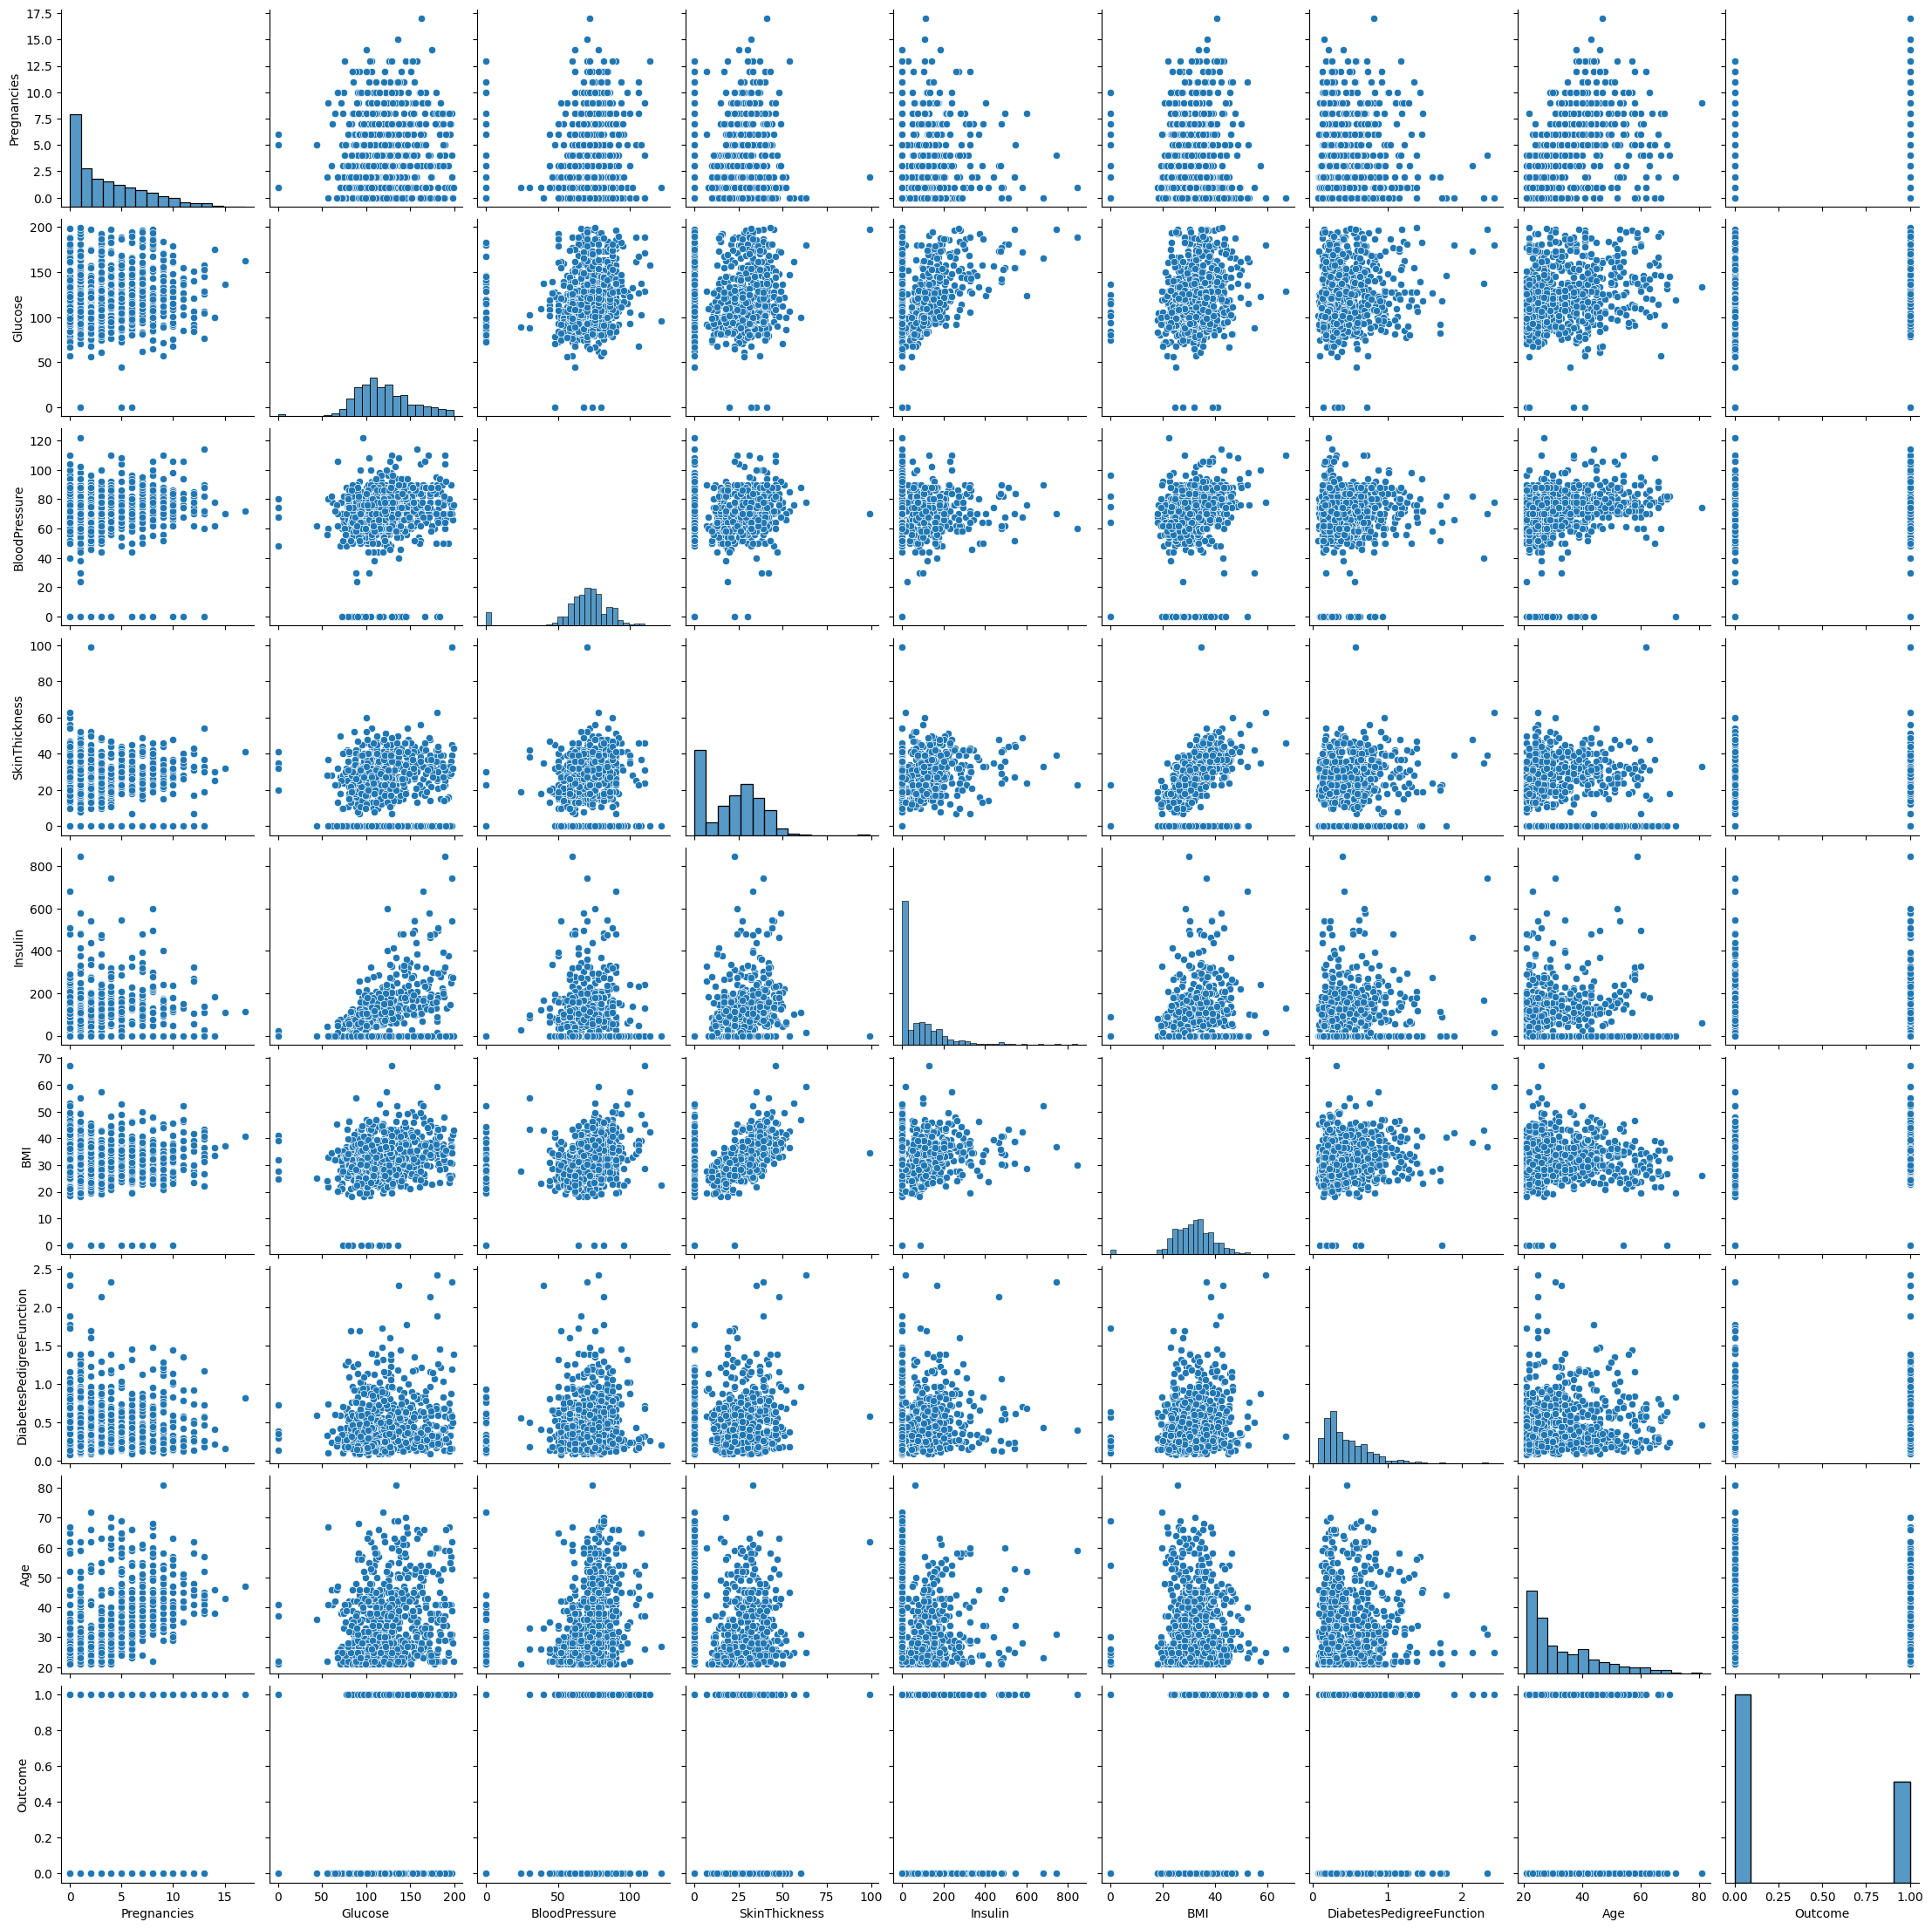

In [6]:
sns.pairplot(diabetes)

In [7]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
x = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

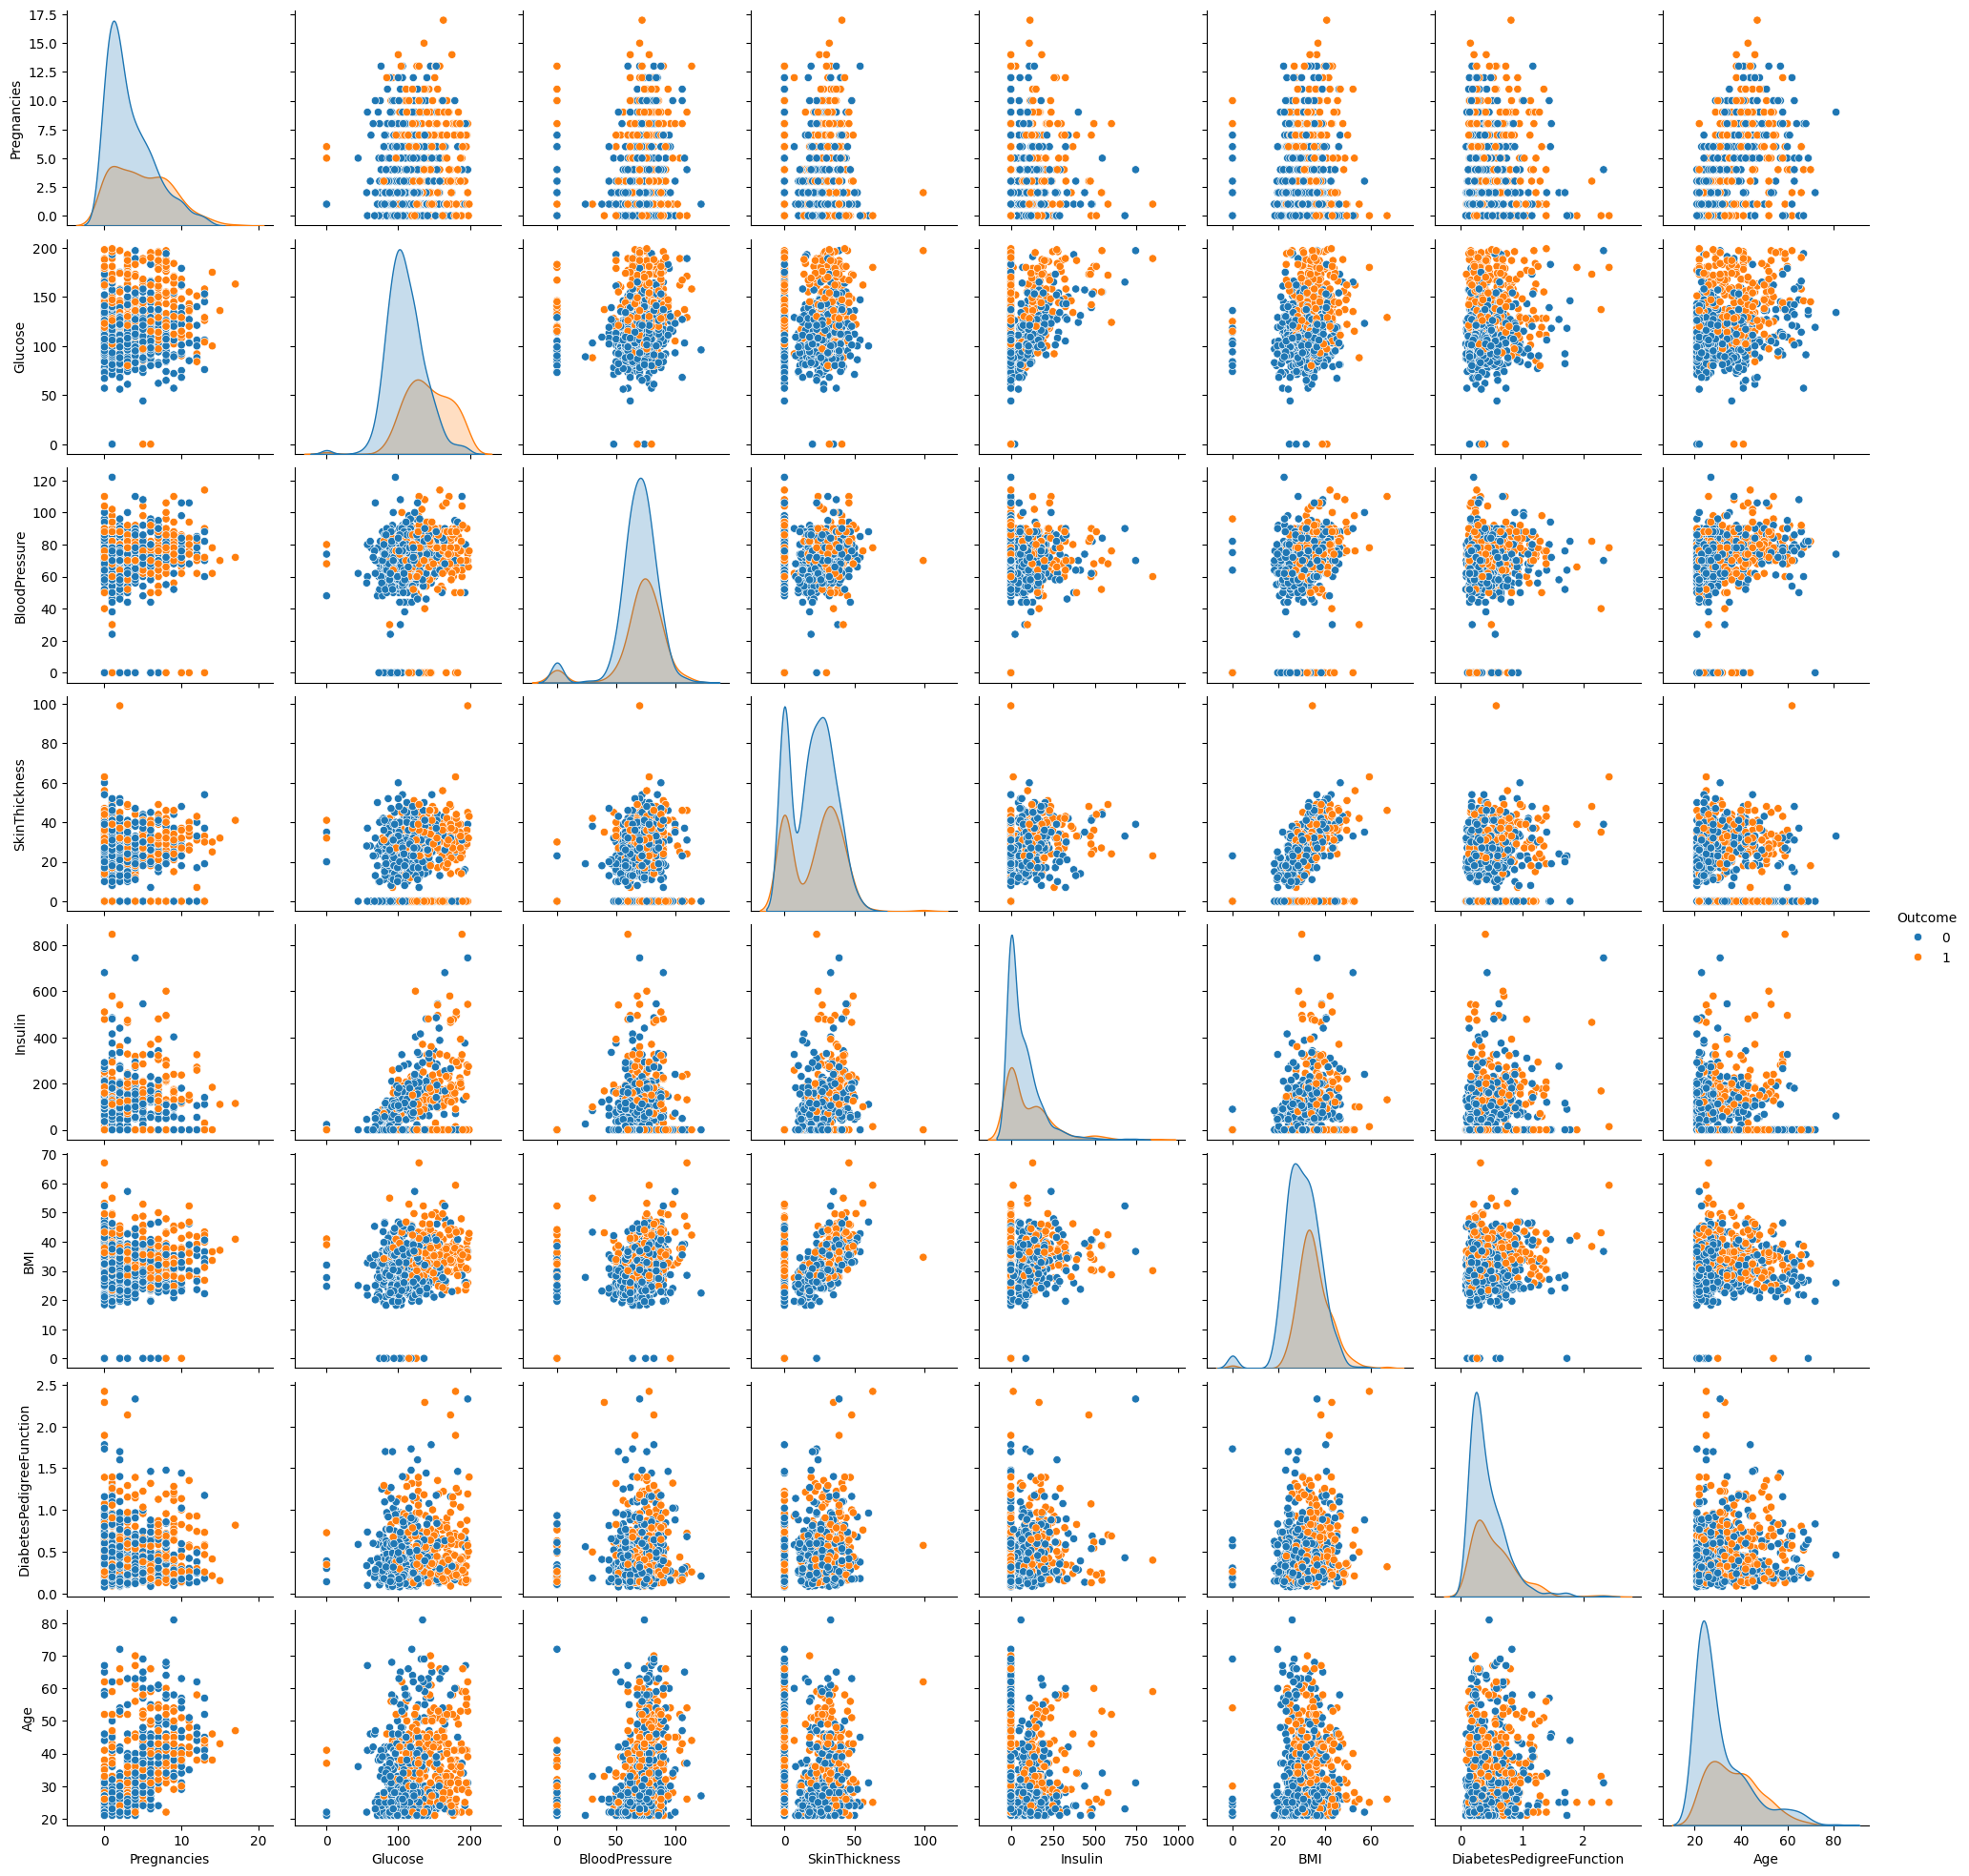

In [9]:
sns.pairplot(diabetes, hue='Outcome')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=500)
LR_model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [12]:
from sklearn.metrics import accuracy_score

# Input data for prediction (ensure correct number of features)
input_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]  # Replace with actual patient data

# Ensure that input matches the feature count
input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1, -1)  # Reshape for prediction

# Making prediction
prediction = LR_model.predict(input_data_reshaped)

# Interpreting the prediction result
if prediction[0] == 0:
    print("The Person does not have Diabetes")
else:
    print("The Person has Diabetes")


The Person has Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


SVM

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM Model
SVC_model = SVC(kernel='linear')
SVC_model.fit(x_train, y_train)

# Predicting on training data to evaluate accuracy
X_train_prediction = SVC_model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

# Input data for prediction (ensure correct number of features)
input_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]

# Ensure that input matches the feature count
input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1, -1)  # Reshape for prediction

# Making prediction
prediction = SVC_model.predict(input_data_reshaped)

# Interpreting the prediction result
if prediction[0] == 0:
    print("The Person does not have Diabetes")
else:
    print("The Person has Diabetes")


The Person has Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Random Forest Model
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(x_train, y_train)

# Predicting on training data to evaluate accuracy
x_train_prediction = RF_model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

# Input data for prediction (ensure correct number of features)
input_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]  # Replace with actual patient data

# Ensure that input matches the feature count
input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1, -1)  # Reshape for prediction

# Making prediction
prediction = RF_model.predict(input_data_reshaped)

# Interpreting the prediction result
if prediction[0] == 0:
    print("The Person does not have Diabetes")
else:
    print("The Person has Diabetes")


The Person has Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
import pickle

# Example: Save Logistic Regression model
with open('logistic_regression.pkl', 'wb') as file:
    pickle.dump(LR_model, file)

# Example: Save Random Forest model
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(RF_model, file)

# Example: Save SVM model
with open('svm.pkl', 'wb') as file:
    pickle.dump(SVC_model, file)


In [16]:
from google.colab import files

# Download the file
files.download('logistic_regression.pkl')
files.download('random_forest.pkl')
files.download('svm.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Heart Disease Prediction

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [19]:
heart = pd.read_csv('heart.csv', delimiter=';')
print(heart.head())
print(heart.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

In [20]:
X = heart.drop('target', axis=1)
y = heart['target']

In [21]:
X = heart.drop('target', axis=1)
y = heart['target']

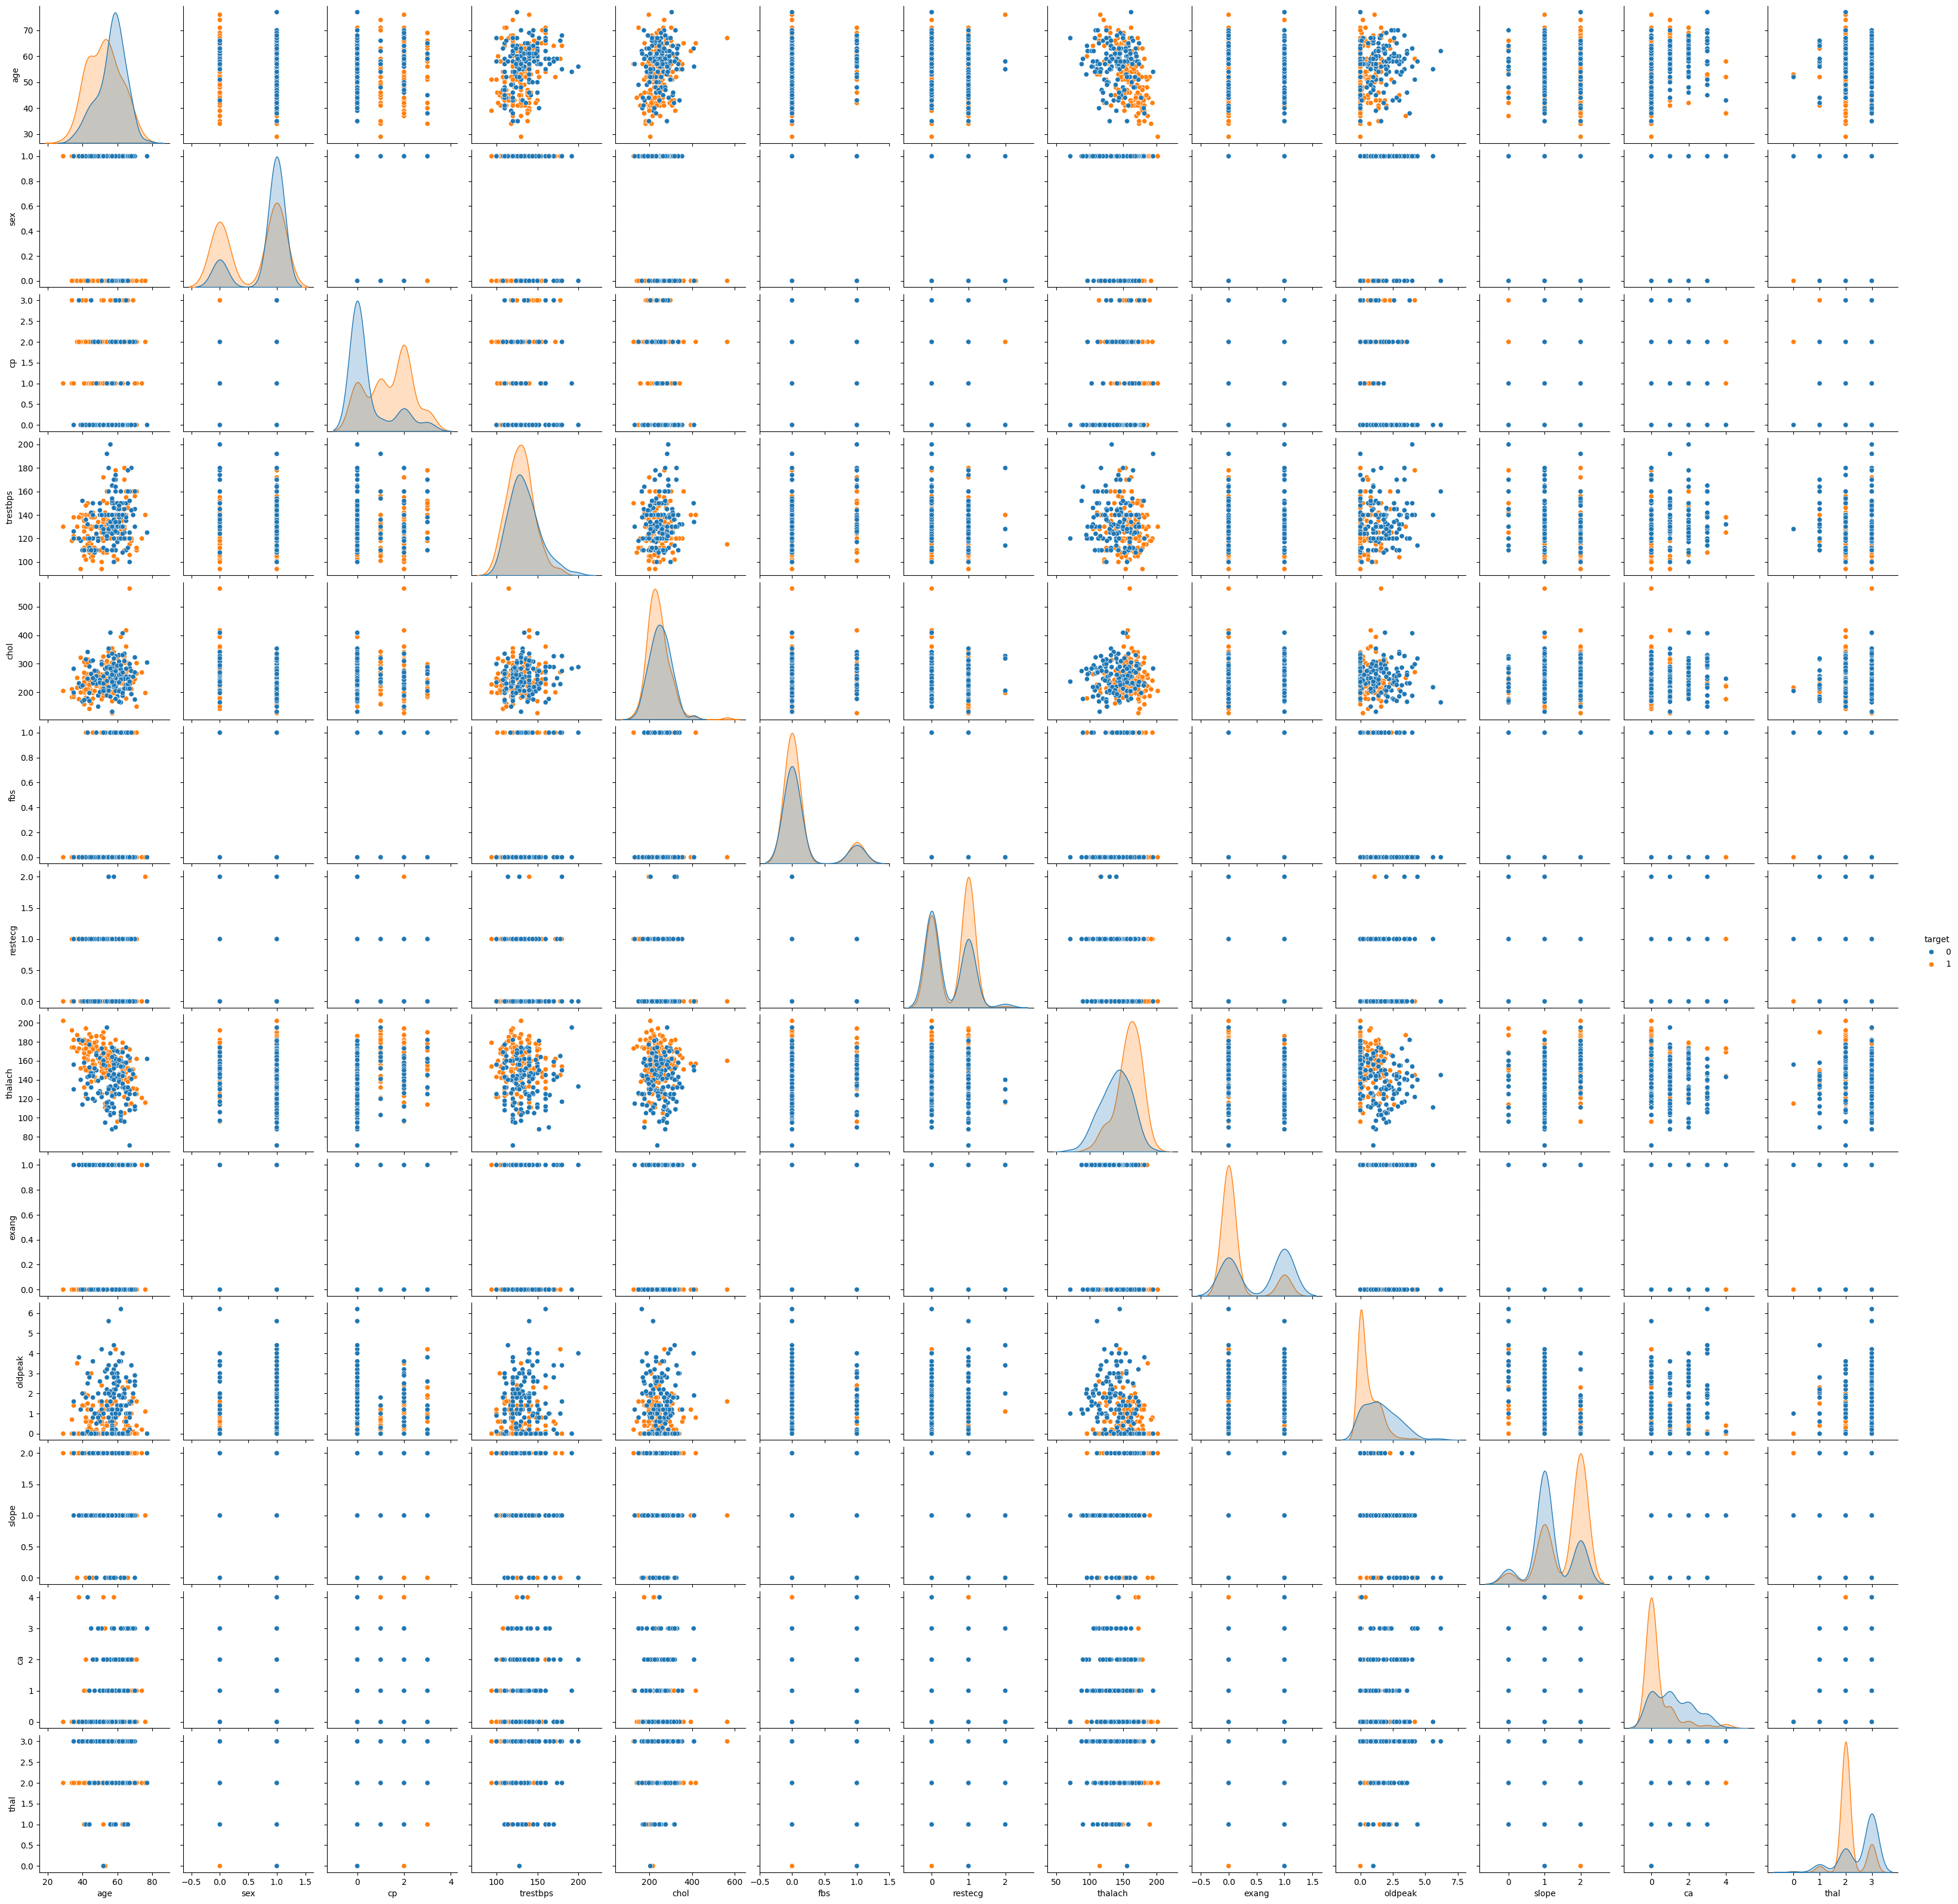

In [22]:
sns.pairplot(heart, hue='target')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Logistic Regression (Baseline)
model1 = LogisticRegression(max_iter=2000, solver='newton-cg')
model1.fit(X_train, y_train)

# Predicting on training data to evaluate accuracy
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

# Input data for prediction
input_data = [62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2]  # Fixed the '2,2' to 2.2
input_data_np = np.asarray(input_data)  # Convert list to numpy array
input_data_reshaped = input_data_np.reshape(1, -1)  # Reshape for prediction

# Making prediction
prediction = model1.predict(input_data_reshaped)

# Interpreting the prediction result
if prediction[0] == 0:
    print("The Person does not have Heart Disease")
else:
    print("The Person has Heart Disease")



The Person does not have Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# SVM Model
model2 = SVC(kernel='linear')  # You can use other kernels like 'rbf', 'poly', etc.
model2.fit(X_train, y_train)

# Predicting on training data to evaluate accuracy
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

# Input data for prediction (ensure the correct number of features)
input_data = [62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2.2]  # Current input with 12 features

# Add a placeholder for the missing feature (e.g., 0 or mean of the column)
input_data.append(0)  # Replace '0' with a more realistic value if needed

# Convert input data to a numpy array
input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1, -1)  # Reshape for prediction

# Making prediction
prediction = model2.predict(input_data_reshaped)

# Interpreting the prediction result
if prediction[0] == 0:
    print("The Person does not have Heart Disease")
else:
    print("The Person has Heart Disease")


The Person does not have Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Random Forest Model
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

# Predicting on training data to evaluate accuracy
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

# Input data for prediction (ensure the correct number of features)
input_data = [62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2.2]  # Current input with 12 features

# Add a placeholder for the missing feature (e.g., 0 or mean of the column)
input_data.append(0)  # Replace '0' with a more realistic value if needed

# Convert input data to a numpy array
input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1, -1)  # Reshape for prediction

# Making prediction
prediction = model3.predict(input_data_reshaped)

# Interpreting the prediction result
if prediction[0] == 0:
    print("The Person does not have Heart Disease")
else:
    print("The Person has Heart Disease")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The Person does not have Heart Disease


In [27]:
import pickle
from google.colab import files

# Example: Save Logistic Regression model
with open('/content/logistic_regression1.pkl', 'wb') as file:
    pickle.dump(model1, file)

# Example: Save Random Forest model
with open('/content/random_forest1.pkl', 'wb') as file:
    pickle.dump(model2, file)

# Example: Save SVM model
with open('/content/svm1.pkl', 'wb') as file:
    pickle.dump(model3, file)

# Download the files
files.download('/content/logistic_regression1.pkl')
files.download('/content/random_forest1.pkl')
files.download('/content/svm1.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>